In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lmfit import Model

In [95]:
# Functions

def line(x, m, b):
    return x * m + b

def tlm(s, r_s, N, w, L, r_c):
    return ((r_s * s) / (2 * N * (w + L + s) - L - s)) + (2 * r_c)

def tlm2(s, r_s, N, w, L, l_t):
    return (r_s / (2 * N * (w + L + s) - L - s)) * (s + 2 * l_t)

def w_contact(s, N, w, L):
    return (2 * N * (w + L + s)) - L - s
    
idea2 = {'P01': 2e-4,
         'P02': 5e-4,
         'P03': 10e-4,
         'P04' : 20e-4
         }



In [89]:
# Models

line_mod = Model(line)
line_params = line_mod.make_params()
line_params['m'].set(value = 1)
line_params['b'].set(value = 1)

tlm_mod = Model(tlm)
tlm_params = tlm_mod.make_params()
tlm_params['r_s'].set(value = 1e6)
tlm_params['N'].set(value = 60, vary = False)
tlm_params['w'].set(value = 5e-4, vary = False)
tlm_params['L'].set(value = 3200e-4, vary = False)
tlm_params['r_c'].set(value = 1)

tlm_mod2 = Model(tlm2)
tlm2_params = tlm_mod2.make_params()
tlm2_params['r_s'].set(value = 1e6)
tlm2_params['N'].set(value = 60, vary = False)
tlm2_params['w'].set(value = 5e-4, vary = False)
tlm2_params['L'].set(value = 3200e-4, vary = False)
tlm2_params['l_t'].set(value = 1, min = 0)



[[Model]]
    Model(tlm)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 15
    # variables        = 2
    chi-square         = 4.2272e+12
    reduced chi-square = 3.2517e+11
    Akaike info crit   = 399.467544
    Bayesian info crit = 400.883644
    R-squared          = 0.92836616
[[Variables]]
    r_s:  1.1382e+11 +/- 8.7688e+09 (7.70%) (init = 1000000)
    N:    60 (fixed)
    w:    0.0005 (fixed)
    L:    0.32 (fixed)
    r_c:  223608.987 +/- 122320.550 (54.70%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(r_s, r_c) = -0.799


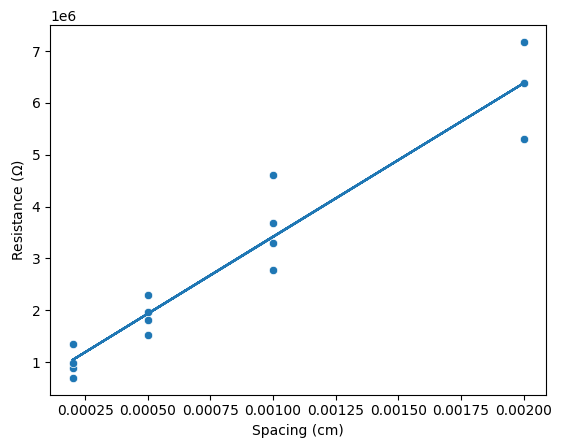

In [101]:
# Potentiostat

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_37\AUT'
files = [os.path.join(path, i) for i in os.listdir(path)]
col = ['Potential (V)', 'Current (A)', 'Time (s)']
col2 = ['Structure', 'Spacing (cm)', 'Resistance ($\Omega$)']
iv_val = pd.DataFrame(columns = col2)

n = 0
for i in files:
    df = pd.read_csv(i, sep = ';', skiprows = 1, names = col)
    line_fit = line_mod.fit(df[col[1]], line_params, x = df[col[0]])
    resistance = 1 / line_fit.values['m']

    
    
    for j in idea2.keys():
        if j in i:
            iv_val.loc[n] = (j, idea2[j], resistance)
    n += 1

width_ = (w_contact(iv_val[col2[1]], 60, 5e-4, 3200e-4))
width_avg = width_.mean()

tlm_fit = tlm_mod.fit(iv_val[col2[2]], tlm_params, s = iv_val[col2[1]])
print(tlm_fit.fit_report())

# Plot
sns.scatterplot(data = iv_val, x = col2[1], y = col2[2])
plt.plot(iv_val[col2[1]], tlm_fit.best_fit)


# plt.scatter(df[col[0]], df[col[1]])
# plt.plot(df[col[0]], line_fit.best_fit, c = 'k')


[[Model]]
    Model(tlm2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 237
    # data points      = 15
    # variables        = 2
    chi-square         = 4.2272e+12
    reduced chi-square = 3.2517e+11
    Akaike info crit   = 399.467544
    Bayesian info crit = 400.883644
    R-squared          = 0.92836616
[[Variables]]
    r_s:  1.1387e+11 +/- 8.7456e+09 (7.68%) (init = 1000000)
    N:    60 (fixed)
    w:    0.0005 (fixed)
    L:    0.32 (fixed)
    l_t:  7.4895e-05 +/- 4.5682e-05 (60.99%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(r_s, l_t) = -0.841
0     38.1638
1     38.1995
2     38.2590
3     38.3780
4     38.1638
5     38.1995
6     38.2590
7     38.3780
8     38.1638
9     38.1995
10    38.2590
11    38.3780
12    38.1638
13    38.1995
14    38.2590
Name: Spacing (cm), dtype: float64


640.4376929283235

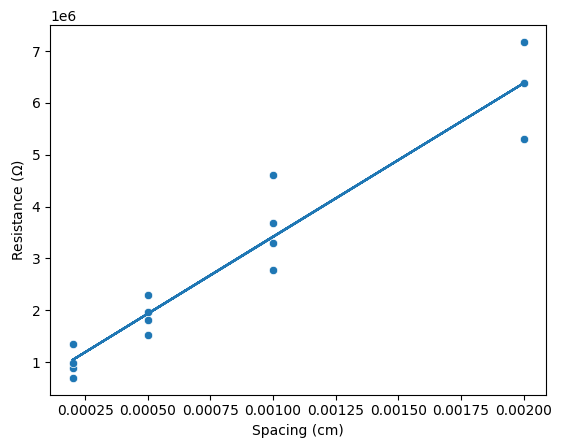

In [103]:
tlm_fit2 = tlm_mod2.fit(iv_val[col2[2]], tlm2_params, s = iv_val[col2[1]])
print(tlm_fit2.fit_report())
rc = tlm_mod2.eval(tlm_fit2.params, s = 0) / 2
lt = tlm_fit2.values['l_t']
p_c = rc * lt * width_avg #Contact resistiviy ohm * cm^2


sns.scatterplot(data = iv_val, x = col2[1], y = col2[2])
plt.plot(iv_val[col2[1]], tlm_fit2.best_fit)
print(width_)
p_c

38.241546666666665